In [1]:
import pandas as pd
import numpy as np
import missingno
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
import seaborn as sns

In [2]:
df = pd.read_table('WDIData.csv',',')
df2= pd.read_table('Human Development Index.csv',',')
WDI_edu  = df.copy()
WDI_edu.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.783289,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN
1,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,86.428272,87.070576,88.176836,87.342739,89.130121,89.678685,90.273687,NaN,NaN,NaN
2,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.942103,75.244104,77.162305,75.538976,78.741152,79.665635,80.749293,NaN,NaN,NaN
3,Arab World,ARB,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,95.939242,95.962166,96.352930,95.997833,96.649916,96.834184,97.003974,NaN,NaN,NaN
4,Arab World,ARB,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,22.260538,NaN,NaN,30.277130,NaN,NaN,37.165211,NaN,NaN,NaN


In [3]:
df2.head()

,Country Name,HDI Rank (2018),HDI
0,Afghanistan,170,0.496
1,Albania,69,0.791
2,Algeria,82,0.759
3,Andorra,36,0.857
4,Angola,149,0.574


In [4]:
missing_values_count =WDI_edu.isnull().sum()
missing_values_count

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1960              339707
                   ...  
2016              177336
2017              195253
2018              228692
2019              352989
Unnamed: 64       377256
Length: 65, dtype: int64

In [5]:
df_merged = WDI_edu.merge(df2, on = ['Country Name'], how = 'left')

In [6]:
print(df_merged.dtypes)
print(df_merged.shape)

Country Name        object
Country Code        object
Indicator Name      object
Indicator Code      object
1960               float64
                    ...   
2018               float64
2019               float64
Unnamed: 64        float64
HDI Rank (2018)    float64
HDI                float64
Length: 67, dtype: object
(377256, 67)


In [7]:
df_merged.drop(['2019','Unnamed: 64'], axis =1,inplace= True)

In [8]:
df_merged.drop_duplicates().head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,HDI Rank (2018),HDI
0,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.783289,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN
1,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,86.428272,87.070576,88.176836,87.342739,89.130121,89.678685,90.273687,NaN,NaN,NaN
2,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.942103,75.244104,77.162305,75.538976,78.741152,79.665635,80.749293,NaN,NaN,NaN
3,Arab World,ARB,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,95.939242,95.962166,96.352930,95.997833,96.649916,96.834184,97.003974,NaN,NaN,NaN
4,Arab World,ARB,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,22.260538,NaN,NaN,30.277130,NaN,NaN,37.165211,NaN,NaN,NaN


In [9]:
countr_indicators_lis = list(df_merged.columns[[0,1,2,3,63,64]])
print(countr_indicators_lis)
year_lis = list(df_merged.columns[4:63])
print(year_lis)
indicator_name = df_merged['Indicator Name'].unique()

Edu_lit =df_merged[df_merged['Indicator Name'].str[:13]=='Literacy rate']
Avg_work_hrs = df_merged[df_merged['Indicator Name'].str[:15]=='Average working']
Edu_lit.shape
Edu_lit_melted = pd.melt(Edu_lit, id_vars=countr_indicators_lis, value_vars=year_lis ,var_name='year')
Avg_work_hrs_melted = pd.melt(Avg_work_hrs, id_vars=countr_indicators_lis, value_vars=year_lis ,var_name='year')
print(Edu_lit_melted)
print(Avg_work_hrs_melted)

['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'HDI Rank (2018)', 'HDI']
['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
       Country Name Country Code  \
0        Arab World          ARB   
1        Arab World          ARB   
2        Arab World          ARB   
3        Arab World          ARB   
4        Arab World          ARB   
...             ...          ...   
109027     Zimbabwe          ZWE   
109028     Zimbabwe          ZWE   
109029     Zimbabwe          ZWE   
109030     Zimbabwe          ZWE   
109031     Zimbabwe          ZWE   


In [10]:
Edu_lit_melted = Edu_lit_melted[Edu_lit_melted['value'].isnull()==False]
Edu_lit_melted = Edu_lit_melted[Edu_lit_melted['value']!='..']
Edu_lit_melted.astype({'value': 'float64'})
#Edu_lit_melted.dtypes
Edu_lit_melted.sort_values(by='value')
print(Edu_lit_melted)

       Country Name Country Code  \
18921      Barbados          BRB   
18922      Barbados          BRB   
18923      Barbados          BRB   
18924      Barbados          BRB   
18925      Barbados          BRB   
...             ...          ...   
109020       Zambia          ZMB   
109021       Zambia          ZMB   
109022       Zambia          ZMB   
109023       Zambia          ZMB   
109024       Zambia          ZMB   

                                           Indicator Name  \
18921   Literacy rate, adult female (% of females ages...   
18922   Literacy rate, adult male (% of males ages 15 ...   
18923   Literacy rate, adult total (% of people ages 1...   
18924   Literacy rate, youth (ages 15-24), gender pari...   
18925   Literacy rate, youth female (% of females ages...   
...                                                   ...   
109020  Literacy rate, adult total (% of people ages 1...   
109021  Literacy rate, youth (ages 15-24), gender pari...   
109022  Literacy r

c:\program files\python\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [11]:
Edu_lit_melted.astype({'year': 'int32'})
print(indicator_name.shape)
print(Edu_lit_melted['Indicator Name'].unique())
print(Edu_lit_melted['year'].unique())
print(Edu_lit_melted['Country Name'].unique())

(1429,)
['Literacy rate, adult female (% of females ages 15 and above)'
 'Literacy rate, adult male (% of males ages 15 and above)'
 'Literacy rate, adult total (% of people ages 15 and above)'
 'Literacy rate, youth (ages 15-24), gender parity index (GPI)'
 'Literacy rate, youth female (% of females ages 15-24)'
 'Literacy rate, youth male (% of males ages 15-24)'
 'Literacy rate, youth total (% of people ages 15-24)']
['1970' '1971' '1972' '1973' '1974' '1975' '1976' '1977' '1978' '1979'
 '1980' '1981' '1982' '1983' '1984' '1985' '1986' '1987' '1988' '1989'
 '1990' '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999'
 '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018']
['Barbados' 'Grenada' 'St. Vincent and the Grenadines'
 'Middle East & North Africa (IDA & IBRD countries)'
 'Middle East & North Africa (excluding high income)' 'Somalia'
 'Middle East & North Africa' 'Latin America & Caribbea

In [12]:
Avg_work_hrs_melted = Avg_work_hrs_melted[Avg_work_hrs_melted['value'].isnull()==False]
Avg_work_hrs_melted= Avg_work_hrs_melted[Avg_work_hrs_melted['value']!='..']
Avg_work_hrs_melted.astype({'value': 'float64'})
Avg_work_hrs_melted.sort_values(by='value')
print(Avg_work_hrs_melted)

      Country Name Country Code  \
62874      Namibia          NAM   
62875      Namibia          NAM   
62876      Namibia          NAM   
62877      Namibia          NAM   
62878      Namibia          NAM   
...            ...          ...   
89581       Jordan          JOR   
89582       Jordan          JOR   
89583       Jordan          JOR   
89584       Jordan          JOR   
89585       Jordan          JOR   

                                          Indicator Name  \
62874  Average working hours of children, study and w...   
62875  Average working hours of children, study and w...   
62876  Average working hours of children, study and w...   
62877  Average working hours of children, working onl...   
62878  Average working hours of children, working onl...   
...                                                  ...   
89581  Average working hours of children, study and w...   
89582  Average working hours of children, study and w...   
89583  Average working hours of childre

In [13]:
Avg_work_hrs_melted.astype({'year': 'int32'})
print(Avg_work_hrs_melted['Indicator Name'].unique())
print(Avg_work_hrs_melted['year'].unique())
print(Avg_work_hrs_melted['Country Name'].unique())

['Average working hours of children, study and work, ages 7-14 (hours per week)'
 'Average working hours of children, study and work, female, ages 7-14 (hours per week)'
 'Average working hours of children, study and work, male, ages 7-14 (hours per week)'
 'Average working hours of children, working only, ages 7-14 (hours per week)'
 'Average working hours of children, working only, female, ages 7-14 (hours per week)'
 'Average working hours of children, working only, male, ages 7-14 (hours per week)']
['1999' '2000' '2001' '2005' '2006' '2007' '2008' '2009' '2010' '2011'
 '2012' '2013' '2014' '2015' '2016']
['Namibia' 'Zimbabwe' 'Kenya' 'Lesotho' 'Romania' 'Angola' 'Azerbaijan'
 'Paraguay' 'Serbia' 'Tajikistan' 'Thailand' 'Uzbekistan' 'Bangladesh'
 'Bosnia and Herzegovina' 'Georgia' 'Ghana' 'Guinea-Bissau' 'Kazakhstan'
 'Somalia' 'Syrian Arab Republic' 'Trinidad and Tobago' 'Turkey'
 'Venezuela, RB' 'Jordan' 'Kyrgyz Republic' 'Madagascar' 'Mauritania'
 'Timor-Leste' 'Gambia, The' 'Mo

In [14]:
df_Edu_lit_melted_1 = Edu_lit_melted
Selected_Ind_1 = df_Edu_lit_melted_1 [df_Edu_lit_melted_1 ['Indicator Name']=='Literacy rate, adult total (% of people ages 15 and above)']
Selected_Ind_1['HDI']=Selected_Ind_1['HDI']*100
print(Selected_Ind_1.head())

df_Avg_work_hrs_melted_1 = Avg_work_hrs_melted
Selected_Ind_Avg_1 = df_Avg_work_hrs_melted_1 [df_Avg_work_hrs_melted_1 ['Indicator Name']=='Average working hours of children, working only, ages 7-14 (hours per week)']
Selected_Ind_Avg_1['HDI']=Selected_Ind_Avg_1['HDI']*100
Selected_Ind_Avg_1['value']=Selected_Ind_Avg_1['value']/(168)*100
print(Selected_Ind_Avg_1.head())

                                            Country Name Country Code  \
18923                                           Barbados          BRB   
19357                                            Grenada          GRD   
20099                     St. Vincent and the Grenadines          VCT   
22381  Middle East & North Africa (excluding high inc...          MNA   
22388  Middle East & North Africa (IDA & IBRD countries)          TMN   

                                          Indicator Name  Indicator Code  \
18923  Literacy rate, adult total (% of people ages 1...  SE.ADT.LITR.ZS   
19357  Literacy rate, adult total (% of people ages 1...  SE.ADT.LITR.ZS   
20099  Literacy rate, adult total (% of people ages 1...  SE.ADT.LITR.ZS   
22381  Literacy rate, adult total (% of people ages 1...  SE.ADT.LITR.ZS   
22388  Literacy rate, adult total (% of people ages 1...  SE.ADT.LITR.ZS   

       HDI Rank (2018)   HDI  year     value  
18923             56.0  81.3  1970  99.26808  
19357     

c:\program files\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\program files\python\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\program files\python\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [15]:
df_Edu_lit_melted_2 = Edu_lit_melted
Selected_Ind_2 = df_Edu_lit_melted_2 [df_Edu_lit_melted_2 ['Indicator Name']=='Literacy rate, youth total (% of people ages 15-24)']
Selected_Ind_2['HDI']=Selected_Ind_2['HDI']*100
print(Selected_Ind_2.head())

df_Avg_work_hrs_melted_2 = Avg_work_hrs_melted
Selected_Ind_Avg_2 = df_Avg_work_hrs_melted_2 [df_Avg_work_hrs_melted_2 ['Indicator Name']=='Average working hours of children, study and work, ages 7-14 (hours per week)']
Selected_Ind_Avg_2['HDI']=Selected_Ind_Avg_2['HDI']*100
Selected_Ind_Avg_2['value']=Selected_Ind_Avg_2['value']/(168)*100
print(Selected_Ind_Avg_2.head())


                                            Country Name Country Code  \
18927                                           Barbados          BRB   
19361                                            Grenada          GRD   
20103                     St. Vincent and the Grenadines          VCT   
22385  Middle East & North Africa (excluding high inc...          MNA   
22392  Middle East & North Africa (IDA & IBRD countries)          TMN   

                                          Indicator Name     Indicator Code  \
18927  Literacy rate, youth total (% of people ages 1...  SE.ADT.1524.LT.ZS   
19361  Literacy rate, youth total (% of people ages 1...  SE.ADT.1524.LT.ZS   
20103  Literacy rate, youth total (% of people ages 1...  SE.ADT.1524.LT.ZS   
22385  Literacy rate, youth total (% of people ages 1...  SE.ADT.1524.LT.ZS   
22392  Literacy rate, youth total (% of people ages 1...  SE.ADT.1524.LT.ZS   

       HDI Rank (2018)   HDI  year     value  
18927             56.0  81.3  1970  99.

c:\program files\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\program files\python\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\program files\python\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

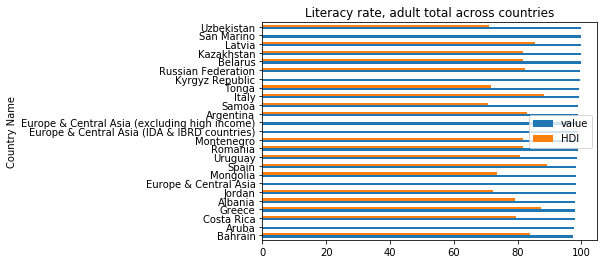

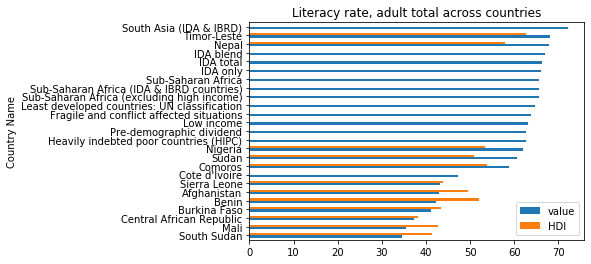

In [16]:
Selected_Ind_1[Selected_Ind_1['year']=='2018'].sort_values(by='value').tail(25).plot.barh(x='Country Name', y=['value','HDI'], title="Literacy rate, adult total across countries")
Selected_Ind_1[Selected_Ind_1['year']=='2018'].sort_values(by='value').head(25).plot.barh(x='Country Name', y=['value','HDI'], title="Literacy rate, adult total across countries")

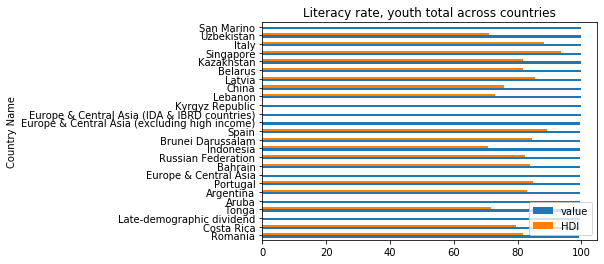

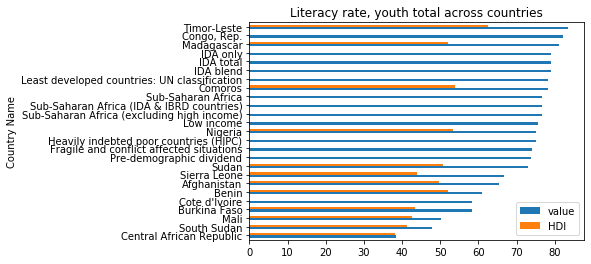

In [17]:
Selected_Ind_2[Selected_Ind_2['year']=='2018'].sort_values(by='value').tail(25).plot.barh(x='Country Name', y=['value','HDI'], title="Literacy rate, youth total across countries")
Selected_Ind_2[Selected_Ind_2['year']=='2018'].sort_values(by='value').head(25).plot.barh(x='Country Name', y=['value','HDI'], title="Literacy rate, youth total across countries")

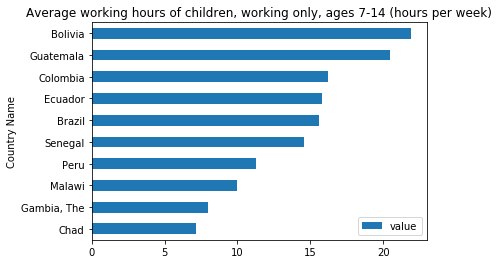

In [18]:
Selected_Ind_Avg_1[Selected_Ind_Avg_1['year']=='2015'].sort_values(by='value').plot.barh(x='Country Name', y=['value'], title='Average working hours of children, working only, ages 7-14 (hours per week)')
#Selected_Ind_Avg[Selected_Ind_Avg['year']=='2016'].sort_values(by='value').head(25).plot.barh(x='Country Name', y=['value'], title='Average working hours of children, working only, ages 7-14 (hours per week)')

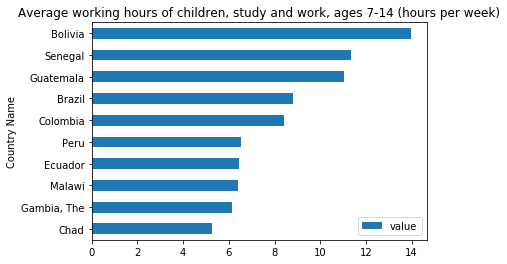

In [19]:
Selected_Ind_Avg_2[Selected_Ind_Avg_2['year']=='2015'].sort_values(by='value').plot.barh(x='Country Name', y=['value'], title='Average working hours of children, study and work, ages 7-14 (hours per week)')

c:\program files\python\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


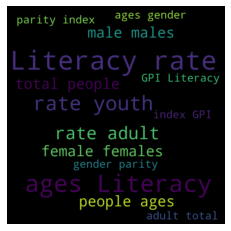

In [20]:
#print(df_L_tot)
def wcloud(filt, filv, colr,w,h,m):
    ld2=df_Edu_lit_melted_1[df_Edu_lit_melted_1[filt]==filv]
    #ld2 = ld2[ld2['Indicator Code']==code]
    ld2['value']= ld2['value'].apply(np.floor)

    txt = ''

    for row in ld2.iterrows():
        n= 0
        while n <= row[1][5]:
            txt += row[1][colr]
            txt += ' '
            n += 1
            #print(row[1][5])
    wordcloud = WordCloud(width = w, height = h, margin = m).generate(txt)
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.margins(x = 0, y = 0)
    plt.show()
    
wcloud('Country Name','South Africa',2,1000,1000,10)


In [21]:
#countries=['SSD']
#df_L_tot = df_L_tot[df_L_tot['Country Code'].isin(countries)]

#df_L_totp = df_L_tot.pivot_table(values='value', columns= 'Indicator Name', index = 'year', aggfunc = 'sum')
#df_L_totp=df_L_totp.dropna()
#df_L_totp.columns
#print(df_L_totp)

In [22]:
def country (df, country_L):
    df = df[df['Country Code'].isin(country_L)]

    dfp = df.pivot_table(values='value', columns= 'Indicator Name', index = ['year','Country Name'], aggfunc = 'mean')
    dfp=dfp.dropna()
    return dfp

Edu_lit_piv = country(Edu_lit_melted,['SSD'])
Edu_lit_tail = country(Edu_lit_melted,['BEN','SSD','CAF','AFG','MLI','BFA','CAF','CIV','SLE'])
print(Edu_lit_tail)

Indicator Name                 Literacy rate, adult female (% of females ages 15 and above)  \
year Country Name                                                                             
1975 Burkina Faso                                                        3.18277              
     Central African Republic                                            8.39958              
1976 Mali                                                                5.73528              
1979 Afghanistan                                                         4.98746              
     Benin                                                               9.53908              
1988 Central African Republic                                           20.33688              
     Cote d'Ivoire                                                      23.43378              
1991 Burkina Faso                                                        8.22543              
1992 Benin                                        

In [23]:
def child_labour (df, country_L):
    df = df[df['Country Code'].isin(country_L)]

    dfp = df.pivot_table(values='value', columns= 'Indicator Name', index = ['year'], aggfunc = 'mean')
    dfp=dfp.dropna()
    return dfp

Avg_work_tail = child_labour(Avg_work_hrs_melted,['SSD','BEN','MLI','AFG','CAF'])
                                #'BFA','CAF','CIV','SLE'])
print(Avg_work_tail)

Indicator Name  Average working hours of children, study and work, ages 7-14 (hours per week)  \
year                                                                                            
2010                                                         15.7                               
2011                                                         13.1                               
2012                                                         10.6                               
2013                                                         16.3                               

Indicator Name  Average working hours of children, study and work, female, ages 7-14 (hours per week)  \
year                                                                                                    
2010                                                         14.3                                       
2011                                                          9.2                                     

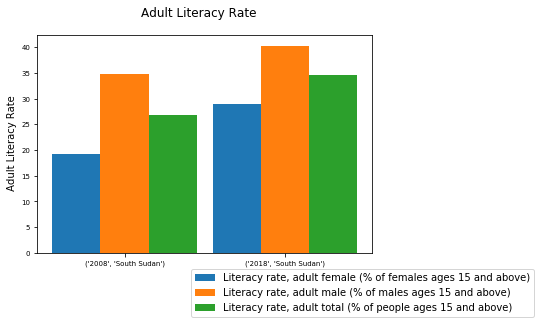

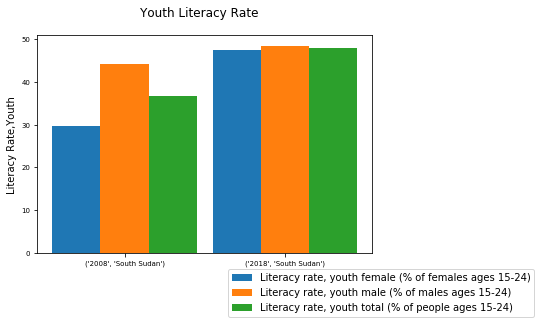

In [24]:
def barg(df,ylabel,tlabel):
    labels = df.index
    x = np.arange(len(labels))  # the label locations
    fig, ax = plt.subplots()
    #fig(figsize=(10,10))
    fig.suptitle(tlabel)
    l=0
    for col in df.columns:
        data = df[col]
        m = len(df.columns)
        width = 0.9/m 
        rects = ax.bar(x - width+l*width, data, width, label=col)
        l=l+1
    
    ax.set_ylabel(ylabel)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    
    ax.tick_params(axis='both', which='major', labelsize=7)
    ax.tick_params(axis='both', which='minor', labelsize=5)
    ax.legend(bbox_to_anchor=(1.5, -0.05))
    
    

barg(Edu_lit_piv.iloc[:,[0,1,2]],' Adult Literacy Rate','Adult Literacy Rate')
barg(Edu_lit_piv.iloc[:,[4,5,6]],'Literacy Rate,Youth','Youth Literacy Rate')

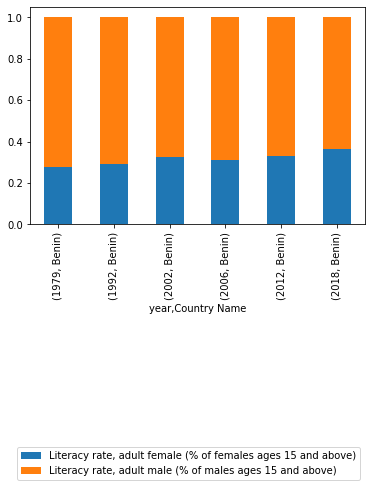

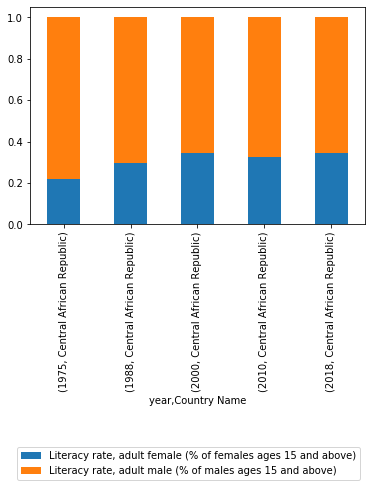

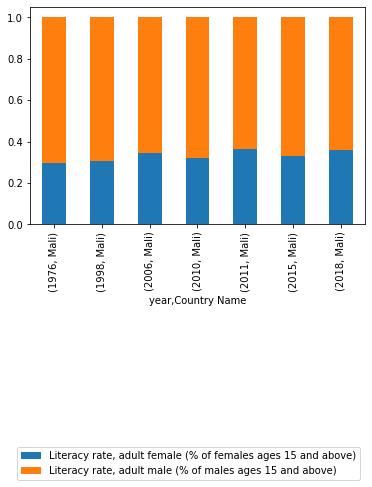

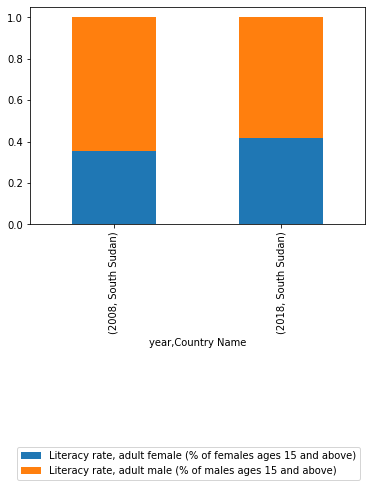

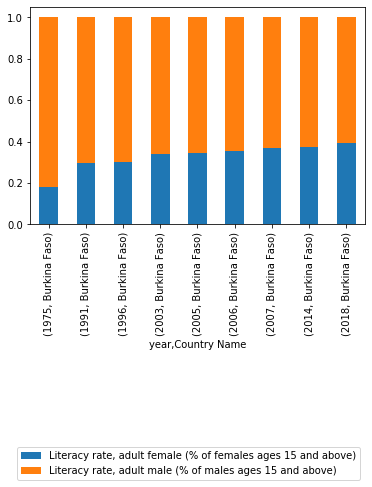

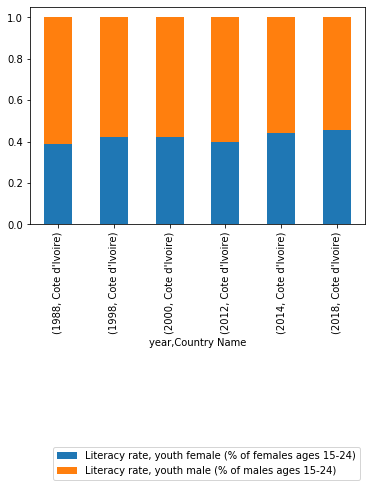

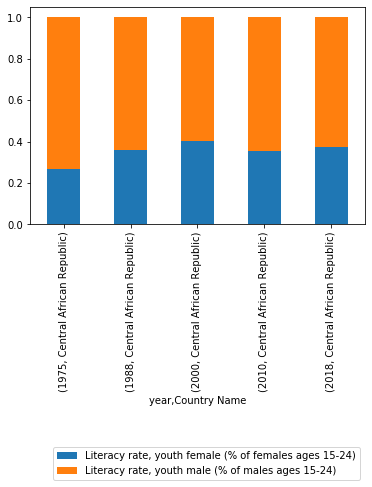

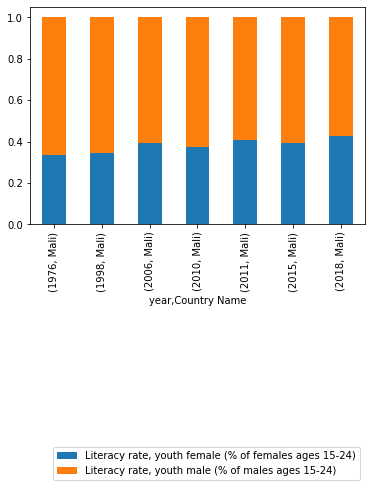

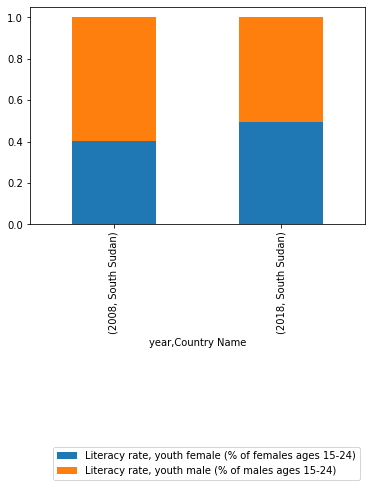

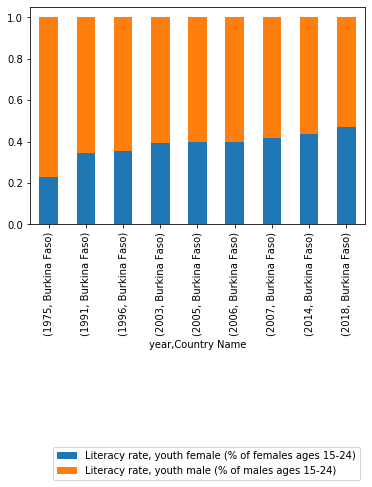

In [25]:
def stacked_bar_graph(df):
    #dfp = df.pivot_table( values = val, index = col,columns=col2,aggfunc=agg)
    df=df.fillna(value=0)
    df_sum = df.sum(axis=1)
    n=0
    for index,row in df.iterrows():
        df.iloc[n]=row/df_sum[index]
        n+=1
    df.plot.bar(stacked=True).legend(bbox_to_anchor=(1, -1.0))
'''def stackedbartot(dfp,dfpt):
    #dfp = df.pivot_table( values = val, index = col,columns=col2,aggfunc=agg)
    dfp=dfp.fillna(value=0)
    dfps = dfp.sum(axis=1)
    n=0
    for index,row in dfp.iterrows():
        dfp.iloc[n]=row/dfps[index]*dfpt.iloc[n,0]
        n+=1
    dfp.plot.bar(stacked=True).legend(bbox_to_anchor=(1.5, -0.15))'''
stacked_bar_graph(Edu_lit_tail.loc[(slice(None), 'Benin'),:].iloc[:,[0,1]])
stacked_bar_graph(Edu_lit_tail.loc[(slice(None), 'Central African Republic'),:].iloc[:,[0,1]])
stacked_bar_graph(Edu_lit_tail.loc[(slice(None), 'Mali'),:].iloc[:,[0,1]])
stacked_bar_graph(Edu_lit_tail.loc[(slice(None), 'South Sudan'),:].iloc[:,[0,1]])
stacked_bar_graph(Edu_lit_tail.loc[(slice(None), 'Burkina Faso'),:].iloc[:,[0,1]])
stacked_bar_graph(Edu_lit_tail.loc[(slice(None), "Cote d'Ivoire"),:].iloc[:,[4,5]])
stacked_bar_graph(Edu_lit_tail.loc[(slice(None), 'Central African Republic'),:].iloc[:,[4,5]])
stacked_bar_graph(Edu_lit_tail.loc[(slice(None), 'Mali'),:].iloc[:,[4,5]])
stacked_bar_graph(Edu_lit_tail.loc[(slice(None), 'South Sudan'),:].iloc[:,[4,5]])
stacked_bar_graph(Edu_lit_tail.loc[(slice(None), 'Burkina Faso'),:].iloc[:,[4,5]])
#stackedbar100(Edu_lit_tail.iloc[:,[4,5]])


Indicator Name  Average working hours of children, study and work, ages 7-14 (hours per week)  \
year                                                                                            
2010                                                         15.7                               
2011                                                         13.1                               
2012                                                         10.6                               
2013                                                         16.3                               

Indicator Name  Average working hours of children, study and work, female, ages 7-14 (hours per week)  \
year                                                                                                    
2010                                                         14.3                                       
2011                                                          9.2                                     

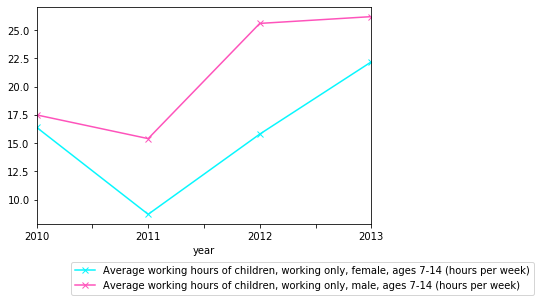

In [28]:
print(Avg_work_tail)
import pandas as pd
import matplotlib.pyplot as plt
df =Avg_work_tail.iloc[:,[4,5]]
fig, ax = plt.subplots()
colors = ['#08F7FE',  # teal/cyan
    '#FE53BB',  # pink
    '#F5D300',  # yellow
    '#00ff41', # matrix green]
df.plot(marker='x', ax=ax, color=colors).legend(bbox_to_anchor=(1.5, -0.15))
plt.show()